In [34]:
# magic, dependencies, load data
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

city = "resources/city_data.csv"
ride = "resources/ride_data.csv"
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

In [35]:
# do some data checks, mostly for nulls
city_df.count()
city_df.isnull().sum()
city_df.dtypes
ride_df.count()
ride_df.isnull().sum()
city_df.dtypes
city_df["type"].unique()
sum(city_df["type"]=="Rural")

18

In [36]:
# merge and create DFs per city type
pyber_df = pd.merge(ride_df, city_df, how = "left", on =["city", "city"])

urban_df = pyber_df[pyber_df["type"] == "Urban"]
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]

In [37]:
# number of rides per city
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [38]:
# ave fare per city
urban_ave_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_ave_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_ave_fare = rural_df.groupby(["city"]).mean()["fare"]

In [46]:
# ave number of drivers per city
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

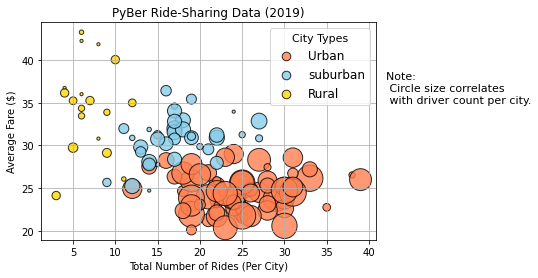

In [72]:
# scatter urban

#plt.subplots(figsize=(8, 8))
plt.scatter(urban_ride_count, 
            urban_ave_fare,
            s = 10 * urban_driver_count, c = "coral",
            edgecolor="black", linewidths = 1,
            alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, 
            suburban_ave_fare,
            s = 10 * suburban_driver_count, c = "skyblue",
            edgecolor="black", linewidths = 1,
            alpha=0.8, label="suburban")
plt.scatter(rural_ride_count, 
            rural_ave_fare,
            s = 10 * rural_driver_count, c = "gold",
            edgecolor="black", linewidths = 1,
            alpha=0.8, label="Rural")

# beautify plus legend
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [74]
lgnd.legendHandles[1]._sizes = [74]
lgnd.legendHandles[2]._sizes = [74]
lgnd.get_title().set_fontsize(11)

plt.text(42, 35, "Note: \n Circle size correlates \n with driver count per city.", fontsize="11")
plt.savefig("analysis/Fig1.png")